In [1]:
from importlib import reload
import cpclasses
reload(cpclasses)
from cpclasses import *
import torch



In [2]:

class LJGSystem(torch.nn.Module):
    def __init__(self, calc, Natoms):
        torch.nn.Module.__init__(self)
        self.N = Natoms
        pos = 3 * torch.rand((self.N, 2)) + 5
        self.calc = calc

        self.positions = torch.nn.Parameter( pos)
        
    def forward(self):
        rs = torch.pdist(self.positions)
        return torch.sum(self.calc._V(rs))

    def draw(self, ax):
        ax.scatter(self.positions.data[:, 0],
                   self.positions.data[:, 1], s=300)

Step 0, Loss: 19943470.0
Step 1000, Loss: -43.01801681518555
Step 2000, Loss: -43.057456970214844
Step 3000, Loss: -43.141387939453125
Step 4000, Loss: -42.95212173461914
Step 5000, Loss: -42.98462677001953
Step 6000, Loss: -43.13336181640625
Step 7000, Loss: -43.02089309692383
Step 8000, Loss: -43.166229248046875
Step 9000, Loss: -43.10273742675781


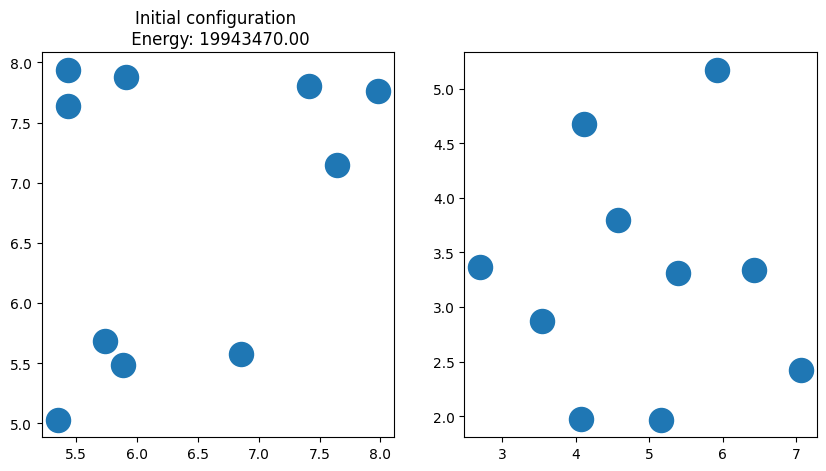

In [13]:
LJG = LJGSystem(LennardJonesGaussTorch(eps=2, r0=1.9), 10)
LJG()

fig, axs = plt.subplots(1,2, figsize=(10,5))

LJG.draw(axs[0])
axs[0].set_title(f'Initial configuration \n Energy: {LJG():.2f}')



optimizer = torch.optim.Adam(LJG.parameters(), lr=0.1)
steps = 10000

for step in range(steps):
    optimizer.zero_grad()
    energy = LJG()
    energy.backward()

    #Ensure it doesn't go too close
    torch.nn.utils.clip_grad_value_(LJG.parameters(), clip_value = 0.5)
    optimizer.step()

    if step % 1000 == 0:
        print(f'Step {step}, Loss: {energy.item()}')

LJG.draw(axs[1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


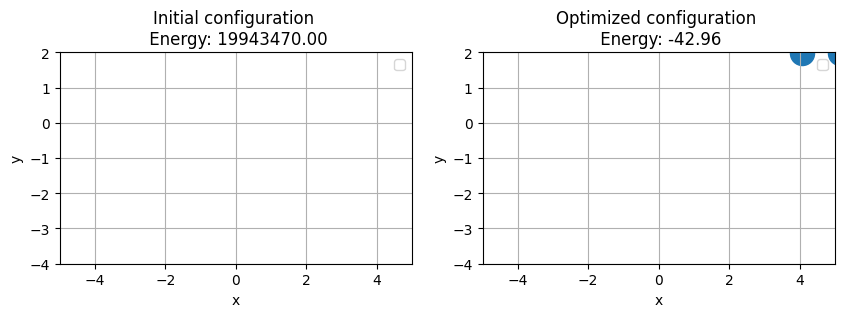

In [14]:

axs[1].set_title(f'Optimized configuration \n Energy: {LJG().item():.2f}')


for ax in axs:
    ax.set_xlim(-5, 5)
    ax.set_ylim(-4, 2)
    format_axis(ax,)
    ax.set_aspect('equal')

fig

Step 0, Loss: 13905261568.0
Step 1000, Loss: -39.3104248046875
Step 0, Loss: 1364674304.0
Step 1000, Loss: -33.87356185913086
Step 0, Loss: 483619405824.0
Step 1000, Loss: -37.92652893066406
Step 0, Loss: 648273.6875
Step 1000, Loss: -37.868194580078125
Step 0, Loss: 106930307072.0
Step 1000, Loss: -37.677879333496094
Step 0, Loss: 16581774.0
Step 1000, Loss: -30.924068450927734


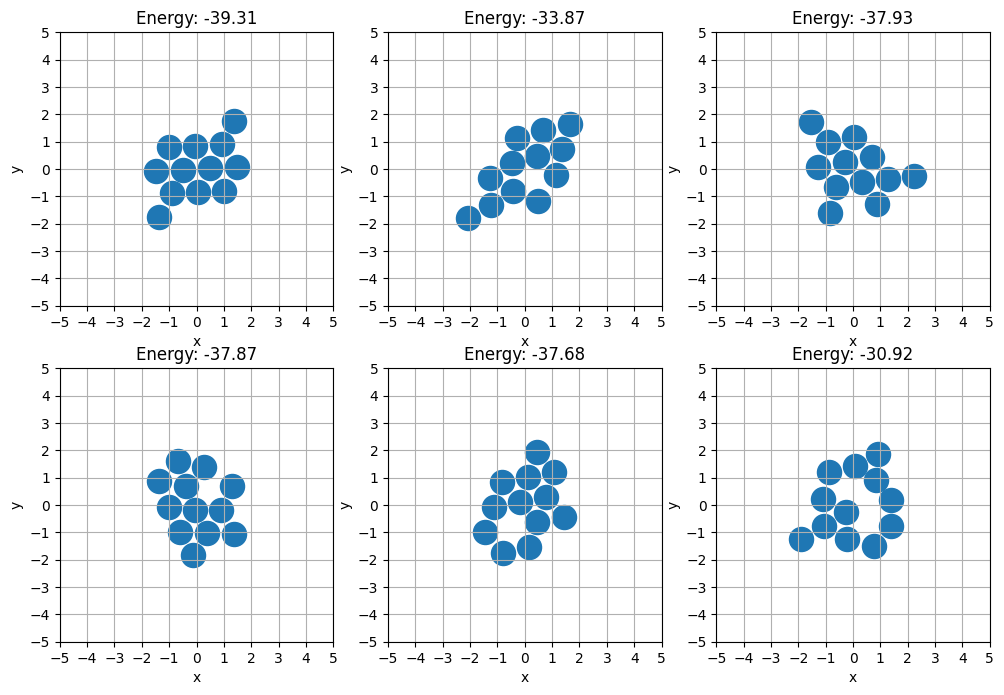

In [19]:
fig, axs = plt.subplots(2,3, figsize = (12,8))


for ax in axs.flatten():
    LJG = LJGSystem(LennardJonesGaussTorch(eps=1), 12)
    optimizer = torch.optim.SGD(LJG.parameters(), lr=0.01)
    steps = 2000

    for step in range(steps):
        optimizer.zero_grad()
        energy = LJG()
        energy.backward()

        #Ensure it doesn't go too close
        torch.nn.utils.clip_grad_value_(LJG.parameters(), clip_value = 0.1)
        optimizer.step()

        if step % 1000 == 0:
            print(f'Step {step}, Loss: {energy.item()}')

    
    format_axis(ax, title=f'Energy: {LJG().item():.2f}', legend=False)

    center_of_mass = torch.mean(LJG.positions.data, dim=0)

    LJG.positions.data -= center_of_mass
    LJG.draw(ax)

    ax.set_xlim(- 5, 5)
    ax.set_ylim(- 5, + 5)
    ax.set(xticks= range(- 5, 6,1), yticks=range(-5, 6, 1))
    


In [20]:
#save_plot(fig, 'LJG_optimisation.png')

Step 0, Loss: 4.254710057834416e+28
Step 1000, Loss: -1504.2366943359375
Step 2000, Loss: -1499.5517578125


KeyboardInterrupt: 

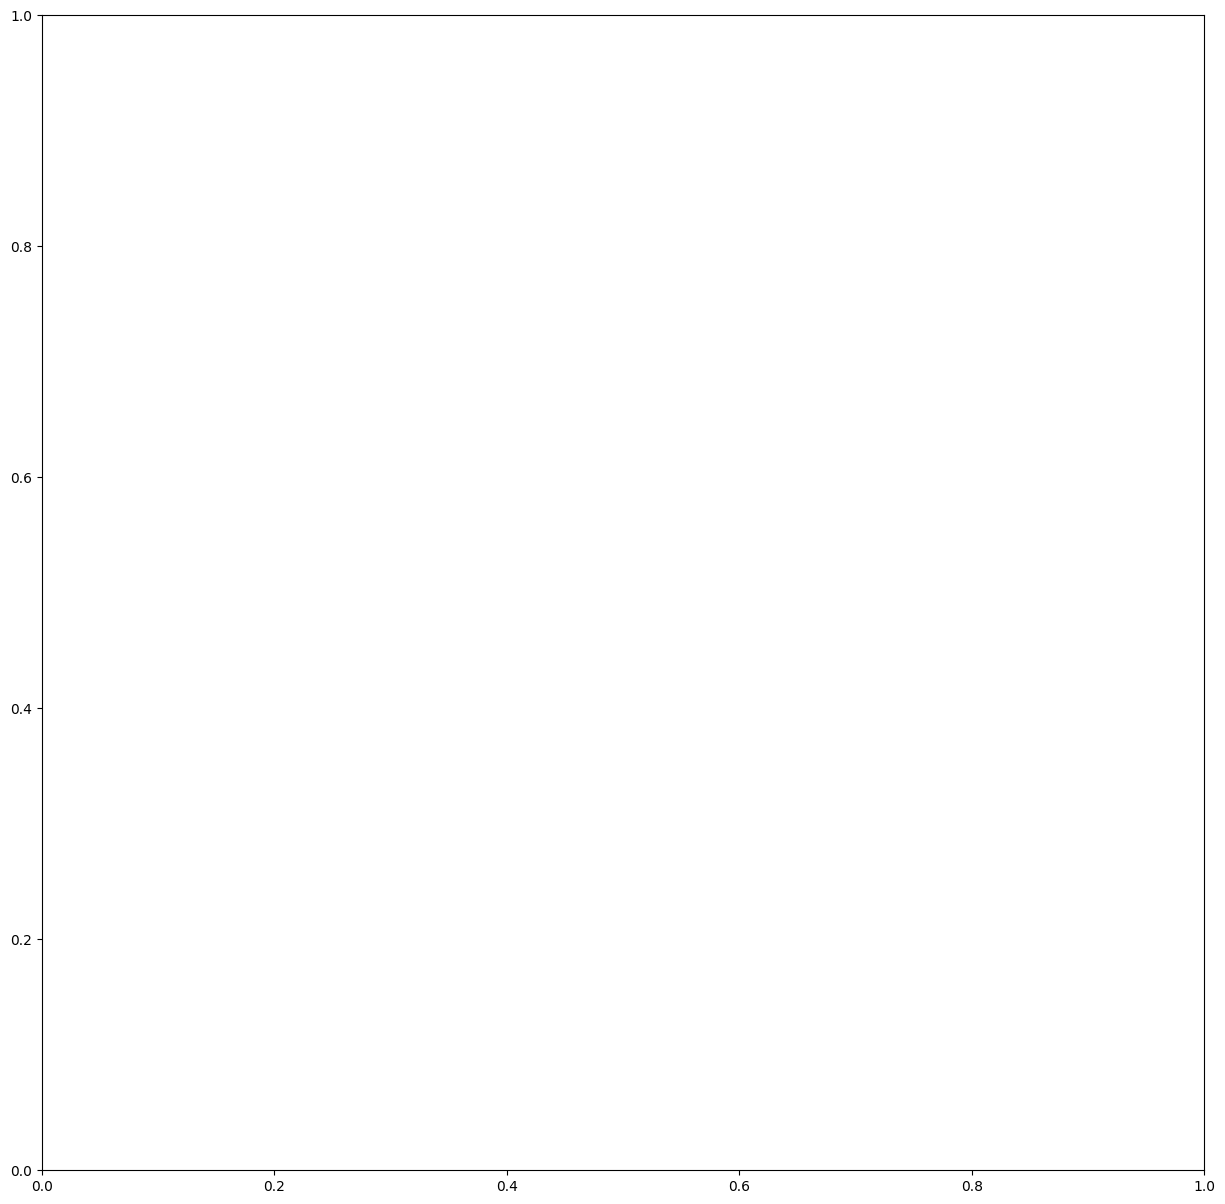

In [17]:


fig, ax = plt.subplots(1,1, figsize = (15,15))


epsilon = 0 

LJG = LJGSystem(LennardJonesGaussTorch(eps = epsilon), 500)
optimizer = torch.optim.Adam(LJG.parameters(), lr=0.1)
steps = 10000

for step in range(steps):
    optimizer.zero_grad()
    energy = LJG()
    energy.backward()

    #Ensure it doesn't go too close
    torch.nn.utils.clip_grad_value_(LJG.parameters(), clip_value = 0.5)
    optimizer.step()

    if step % 1000 == 0:
        print(f'Step {step}, Loss: {energy.item()}')


format_axis(ax, title=f'Energy: {LJG().item():.2f}', legend=False)

center_of_mass = torch.mean(LJG.positions.data, dim=0)

LJG.positions.data -= center_of_mass
LJG.draw(ax)

ax.set_xlim(- 20, 20)
ax.set_ylim(- 20,  20)
ax.set(xticks= range(- 5, 6,1), yticks=range(-5, 6, 1))

ax.set(xlim=(-10, 10), ylim=(-15, 15))
ax.set_xticks(range(-15, 16,1))
ax.set_yticks(range(-15, 16, 1))


#plt.savefig(f'Figures/500_Atoms,Eps = {epsilon}.png', bbox_inches='tight')

(0.5, 5.0)

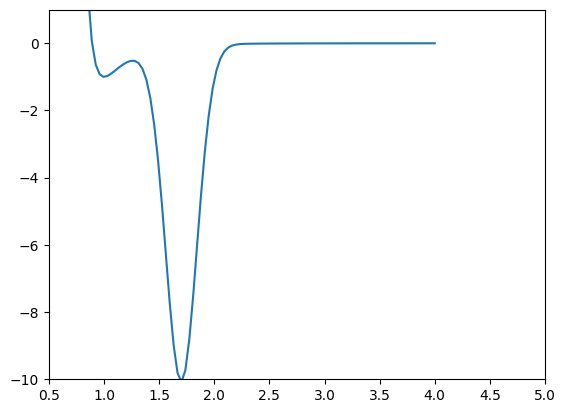

In [8]:
LJG_calc =LennardJonesGaussTorch(eps=10)

x = torch.linspace(0.5, 4, 100)

plt.plot(x, LJG_calc._V(x).detach().numpy())
plt.ylim(-10, 1)
plt.xlim(0.5, 5)